# **Softmax Regression**

**Phân loại đa lớp (Multi-class Classification)**.

Công thức này chuyển đổi một vector các giá trị số thực (gọi là *logits* hoặc $Z$) thành một vector các **xác suất**, trong đó tổng của tất cả các xác suất bằng 1.

---

## 💡 Giải thích Hàm Softmax

$$
\text{Softmax}(Z_i) = \frac{e^{Z_i}}{\sum_{j=1}^{K} e^{Z_j}}
$$

* $Z_i$: Giá trị logit (output thô) của lớp $i$.
* $e$: Hằng số Euler ($\approx 2.718$).
* $\sum_{j=1}^{K} e^{Z_j}$: Tổng của lũy thừa $e$ của tất cả các logit trong $K$ lớp.

### 1. np.exp(z) (Tử số)

* **`np.exp(z)`** tính lũy thừa $e$ cho **từng phần tử** trong ma trận đầu vào $Z$ (các logit).
* **Mục đích:** Đảm bảo tất cả các giá trị đầu ra (xác suất) đều **dương** và khuếch đại sự khác biệt giữa các giá trị logit lớn và nhỏ.

### 2. np.sum(np.exp(z), axis=1, keepdims=True) (Mẫu số)

Phần này tính tổng của tất cả các giá trị đã được lũy thừa $e$ dọc theo trục cần thiết.

#### a. `np.sum(..., axis=1)`: Tính Tổng trên Trục Hàng (Lớp)

* Giả sử $Z$ là ma trận có kích thước $N \times K$:
    * $N$: Số lượng mẫu (dòng).
    * $K$: Số lượng lớp (cột).
* **`axis=1`** chỉ định rằng phép tính tổng sẽ được thực hiện **trên mỗi hàng**, tức là cộng các giá trị lũy thừa $e$ của tất cả các lớp **trong cùng một mẫu**.
* **Kết quả:** Tạo ra một vector có kích thước $N \times 1$.

#### b. `keepdims=True`: Giữ Kích thước

* **`keepdims=True`** đảm bảo rằng kết quả của phép tổng vẫn giữ nguyên số chiều ban đầu (là 2 chiều), ngay cả khi một chiều có kích thước là 1.
* **Mục đích:** Điều này là **cực kỳ quan trọng** cho phép chia ở bước cuối cùng. Nó giữ kết quả tổng có kích thước $N \times 1$, cho phép nó tự động mở rộng kích thước để phù hợp với tử số $N \times K$ thông qua cơ chế **Broadcasting** của NumPy.

### 3. Phép Chia (Broadcasting)

$$
\text{Softmax} = \frac{\text{np.exp}(Z)}{\text{np.sum}(\text{np.exp}(Z), \text{axis}=1, \text{keepdims}=\text{True})}
$$

* **Tử số:** Ma trận $N \times K$ (Các giá trị đã được lũy thừa $e$).
* **Mẫu số:** Vector $N \times 1$ (Tổng của mỗi hàng).
* Khi chia, NumPy tự động **lặp lại** (broadcast) giá trị của mẫu số (tổng của hàng đó) trên tất cả $K$ cột của tử số.

**Kết quả cuối cùng:** Mỗi giá trị logit đã được lũy thừa $e$ sẽ được chia cho tổng của hàng mà nó thuộc về, tạo ra ma trận $N \times K$ chứa các **xác suất** (mỗi hàng có tổng bằng 1).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **One Sample**

In [30]:
X = np.array([
    [0.5],
    [1.0],
    [1.5],
    [2.0],
    [2.5],
    [3.0],
    [3.5],
    [4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])
print(X)
print(Y)

[[0.5]
 [1. ]
 [1.5]
 [2. ]
 [2.5]
 [3. ]
 [3.5]
 [4. ]]
[0 0 1 0 0 1 1 1]


In [3]:
print(len(Y))

8


#### One-hot Encoding

In [31]:
def covert_one_hot(y, k):
    # Tạo một ma trận zeros có kích thước len(y) và k classes
    # Ở đây có 2 classes => Matrix (8 dòng, 2 cột)
    one_hot = np.zeros((len(y), k))
    # Kỹ thuật advanced indexing:
    one_hot[np.arange(len(y)), y] = 1 # 0, 0
    return one_hot

n_classes = 2
Y_onehot = covert_one_hot(Y, n_classes)

# --- Start: Hiểu kỹ thuật advanced indexing: one_hot[np.arange(len(y)), y] = 1 ---
# Ma trận từ ví dụ này được tạo ra có 2 cột tượng trưng cho 2 classes
# 8 dòng tượng trưng cho 8 samples
# mỗi dòng sẽ có một label tương ứng
# quy định cột 1 là label 0, cột 2 là label 1
# dòng thứ nhất có label 0
# value tại cột 1 sẽ bật lên => giá trị là 1, còn cột thứ 2 sẽ tắt => giá trị 0
print("\n Arange => row index: ", np.arange(len(Y)))
print("\n Label Y => col index: ", Y)
# Bây giờ, mình sẽ gán value = 1 tại vị trí có vị trí row, col index tương ứng
# ví dụ Arrange[7], thì Y[7] = 1(ứng cột 2),
# thì giá trị tại dòng 7+1, cột 2 sẽ được bật value lên 1
# --- End ---

print("\n Y_onehot:\n", Y_onehot)


 Arange => row index:  [0 1 2 3 4 5 6 7]

 Label Y => col index:  [0 0 1 0 0 1 1 1]

 Y_onehot:
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# Test
# Đây là một kỹ thuật khác nữa để one-hot encoding
# Tuy nhiên nó xài for-loop ko tối ưu được performance và dài
# Do đó cách trên được ưu tiên hơn
one_hot = np.zeros((len(Y), 2))
for i in range(len(X)):
    one_hot[i, Y[i]] = 1 # i = 0 => Y[0] = 1 => one_hot[0, 1] = 1

one_hot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [6]:
print(f"Y_onehot =\n{Y_onehot}, shape = {Y_onehot.shape}")
print(f"Y = {Y}", f"shape = {Y.shape}")

Y_onehot =
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape = (8, 2)
Y = [0 0 1 0 0 1 1 1] shape = (8,)


#### Take out 1 sample

In [32]:
X_b = np.insert(X, 0, 1, axis=1)
X_b

array([[1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 4. ]])

In [90]:
# Test
# Same insert
X_b = np.hstack([np.ones((X.shape[0], 1)), X])
X_b

array([[1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 4. ]])

In [8]:
X_b[0], Y_onehot[0]

(array([1. , 0.5]), array([1., 0.]))

In [9]:
x = X_b[0].reshape((2,1))
y = Y_onehot[0].reshape((2,1))
x, y
# 1 sample

(array([[1. ],
        [0.5]]),
 array([[1.],
        [0.]]))

### **Training**

In [10]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]]) # Random
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [11]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [83]:
def logit(theta, X):
    return X @ theta

In [13]:
z = logit(theta, x)
y_hat = softmax(z)
z, y_hat

(array([[0.25],
        [0.4 ]]),
 array([[0.46257015],
        [0.53742985]]))

In [14]:
def cross_entropy(y_hat, y):
    print(f"y_hat =\n{y_hat}, shape = {y_hat.shape}")
    print("="*20)
    print(f"y =\n{y}, shape = {y.shape}")
    print("="*20)
    print(f"y*np.log(y_hat) =\n{y*np.log(y_hat)}, shape = {(y*np.log(y_hat)).shape}")
    return - np.sum(y*np.log(y_hat))
loss = cross_entropy(y_hat, y)
loss

y_hat =
[[0.46257015]
 [0.53742985]], shape = (2, 1)
y =
[[1.]
 [0.]], shape = (2, 1)
y*np.log(y_hat) =
[[-0.77095705]
 [-0.        ]], shape = (2, 1)


np.float64(0.7709570477895321)

In [15]:
def cross_entropy_gradient(x, y, y_hat):
    return x @ (y - y_hat).T

In [16]:
# gradient
cross_entropy_gradient(x, y, y_hat)

array([[ 0.53742985, -0.53742985],
       [ 0.26871492, -0.26871492]])

In [17]:
# update theta
theta = theta - 0.01 * cross_entropy_gradient(x, y, y_hat)
np.round(theta, 3)

array([[0.095, 0.205],
       [0.297, 0.403]])

In [18]:
def predict(x, theta):
    z = theta.T.dot(x)
    y_hat = softmax(z)
    return z, y_hat

z, y_hat = predict(x, theta)
z, y_hat

(array([[0.24328213],
        [0.40671787]]),
 array([[0.45923177],
        [0.54076823]]))

In [27]:
def compute_loss(y_hat, y):
    loss = -np.log(y.T.dot(y_hat))
    return loss

loss = compute_loss(y_hat, y)
print(loss)
print(loss.shape)

[[0.77091219]]
(1, 1)


In [21]:
def compute_gradient(y_hat, y, x):
    gradient = x.dot((y_hat - y).T)
    return gradient

gradient = compute_gradient(y_hat, y, x)
gradient

array([[-0.54076823,  0.54076823],
       [-0.27038411,  0.27038411]])

In [22]:
#
lr = 0.01
def update_gradient(theta, gradient, lr):
    return theta - lr * gradient

theta = update_gradient(theta, gradient, lr)
theta

array([[0.10003338, 0.19996662],
       [0.30001669, 0.39998331]])

In [23]:
z, y_hat = predict(x, theta)
z, y_hat

(array([[0.25004173],
        [0.39995827]]),
 array([[0.4625909],
        [0.5374091]]))

In [24]:
loss = compute_loss(y_hat, y)
loss

array([[0.77091219]])

In [43]:
X_b

array([[1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 4. ]])

In [45]:
Y_onehot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [65]:
# Training
# Hyperparameters
theta = np.array([[0.1, 0.2], [0.3, 0.4]]) # (2, 2)
learning_rate = 0.01
n_epochs = 20
n_samples = X_b.shape[0]

losses = []
for epoch in range(n_epochs):
    for i in range(n_samples):
        xi  = X_b[i]
        yi = Y_onehot[i]

        # reshape from 1,2 => 2,1
        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))

        # predict
        z, y_hat = predict(xi, theta)

        # loss
        loss = compute_loss(y_hat, yi)
        losses.append(loss[0])
        # print(loss[0])

        # gradient
        gradient = compute_gradient(y_hat, yi, xi)

        # update
        theta = update_gradient(theta, gradient, lr)

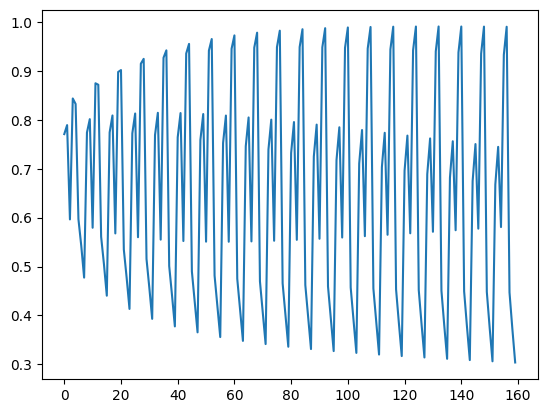

In [66]:
plt.plot(losses)
plt.show()

In [67]:
x_test = np.array([1.0, 0.25]).reshape((2,1))
z, y_hat = predict(x_test, theta)
pred = np.argmax(y_hat)
pred

np.int64(0)

In [68]:
z, y_hat

(array([[0.31282735],
        [0.16217265]]),
 array([[0.5375926],
        [0.4624074]]))

### **Prediction**

In [52]:
theta

array([[ 1.31296438, -1.01296438],
       [ 0.90648219, -0.20648219]])

## **Batch Sample**

In [54]:
X_b, Y_onehot

(array([[1. , 0.5],
        [1. , 1. ],
        [1. , 1.5],
        [1. , 2. ],
        [1. , 2.5],
        [1. , 3. ],
        [1. , 3.5],
        [1. , 4. ]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [55]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [71]:
# define softmax function
def softmax_function(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

In [73]:
# compute y_hat
def predict(x, theta):
    z = x.dot(theta)
    y_hat = softmax_function(z)
    return z, y_hat

z, y_hat = predict(X_b, theta)
z, y_hat

(array([[0.35779554, 0.29220446],
        [0.44773194, 0.55226806],
        [0.53766833, 0.81233167],
        [0.62760472, 1.07239528],
        [0.71754111, 1.33245889],
        [0.8074775 , 1.5925225 ],
        [0.89741389, 1.85258611],
        [0.98735028, 2.11264972]]),
 array([[0.5163919 , 0.4836081 ],
        [0.47388974, 0.52611026],
        [0.43176261, 0.56823739],
        [0.39060007, 0.60939993],
        [0.3509382 , 0.6490618 ],
        [0.31323359, 0.68676641],
        [0.27784584, 0.72215416],
        [0.24502962, 0.75497038]]))

In [74]:
np.max(z, axis=0)

array([0.98735028, 2.11264972])

In [75]:
# compute loss
def compute_loss(y_hat, y):
    loss = -np.log(np.sum(y_hat*y, axis=1))
    return loss

loss = compute_loss(y_hat, Y_onehot)
loss

array([0.66088931, 0.7467806 , 0.56521601, 0.94007109, 1.04714513,
       0.37576106, 0.32551664, 0.28107676])

In [77]:
# compute gradient
def compute_gradient(y_hat, y, x):
    gradient = x.T.dot(y_hat - y)
    return gradient

gradient = compute_gradient(y_hat, Y_onehot, X_b)
gradient

array([[-1.00030844,  1.00030844],
       [-0.06944508,  0.06944508]])

In [78]:
# update weights
learning_rate = 0.01

def update_weight(theta, gradient, learning_rate):
    theta -= (learning_rate * gradient)
    return theta

theta = update_weight(theta, gradient, learning_rate)
theta

array([[0.27786224, 0.02213776],
       [0.18056723, 0.51943277]])

### Training

In [88]:
theta = np.random.rand(2,2) # 2 inputs, 2 labels
learning_rate = 0.01
n_epochs = 500
n_samples = X_b.shape[0]

losses = []
for epoch in range(n_epochs):
    # compute z, y_hat
    z = logit(theta, X_b)
    y_hat = softmax_function(z)
    # z, y_hat = predict(X, theta)

    # compute loss
    loss = compute_loss(y_hat, Y_onehot)
    losses.append(np.sum(loss))

    # compute gradient
    gradient = compute_gradient(y_hat, Y_onehot, X_b)

    # update weight
    theta = update_weight(theta, gradient, learning_rate)

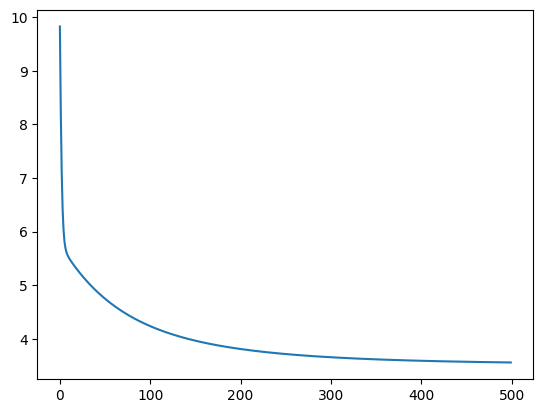

In [89]:
plt.plot(losses)
plt.show()